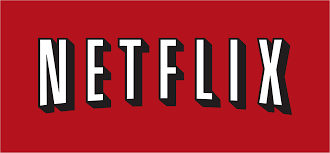

**1. Importing Python Libraries**

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

**2. Importing Dataset**

In [286]:
#using Panda libraries for reading the dataset
netflix_dataset = pd.read_csv('netflix_titles.csv')

**2.1 Analysing first few rows**

In [288]:
#viewing first 5 rows of the dataset
netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**2.2 Finding out Shape and Dimensionality of the dataset**

In [290]:
#shape of the dataset
netflix_dataset.shape

(8807, 12)

In [291]:
#dimension of the dataset
netflix_dataset.ndim

2

**2.3 Extracting datatypes of all the columns**

In [293]:
#datatypes of all columns
netflix_dataset.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**2.4 Extracting dataset's information**

In [295]:
#getting basic information about the dataset
netflix_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


**2.5 Extracting Descriptive statistics for numerical columns**

In [297]:
#getting descriptive statistive for numerical columns
netflix_dataset.describe().round(2)

,release_year
count,8807.00
mean,2014.18
std,8.82
min,1925.00
25%,2013.00
50%,2017.00
75%,2019.00
max,2021.00


**3. Data Cleaning**

As we can see, there are many null values present in this dataset, which might prevent us from drawing meaningful conclusions.

Therefore, the next steps will guide us in handling these null values and duplicates as well. 😀

**3.1 Check for Null values**

In [300]:
#Creating a function to un-nest dataset based on a specific column and checking if there is any comm separated value in this specific column
def unnest_df(df, column):
  return (df.drop(column, axis = 1).join(df[column].str.split(',', expand = True).stack().reset_index(level = 1, drop = True).rename(column)))

#Un-nesting columns one by one

#Un-nesting the 'cast' column
unnested_cast = unnest_df(netflix_dataset, 'cast')

#Un-nesting the 'title' column
unnested_title = unnest_df(netflix_dataset, 'title')

#Un-nesting the 'country' column
unnested_country = unnest_df(netflix_dataset, 'country')

#Un-nesting the 'listed_in' column
unnested_listed_in = unnest_df(netflix_dataset, 'listed_in')

#Un-nesting the 'director' column
unnested_director = unnest_df(netflix_dataset, 'director')

In [301]:
#checking for null values per column (Boolean result)
netflix_dataset.isna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [302]:
#checking for null values per column
netflix_dataset.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

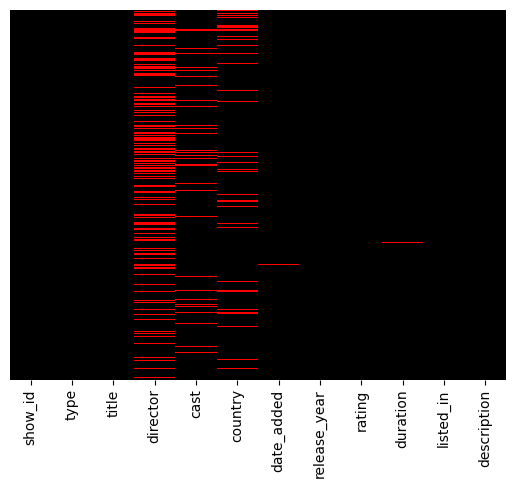

In [303]:
#visualising null values with the help of a heatmap

colors = ['#000000', '#FF0000']  # Red to Black
cmap_color = LinearSegmentedColormap.from_list("red_black", colors, N=100)
sns.heatmap(netflix_dataset.isna(), yticklabels = False, cbar = False, cmap = cmap_color)

**3.2 Handling Null Values**

Updating rows of categorical variables with null values as *Unknown_column_name*.

In [305]:
categorical_col = ['director', 'cast', 'country', 'rating', 'date_added']

for i in categorical_col:
  netflix_dataset[i].fillna(f"Unknown {i.capitalize()}", inplace = True)

netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Now we will be replacing continuous variables having null values with 0.

In [307]:
continuous_var = ['duration']

for i in continuous_var:
  netflix_dataset[i].fillna(0, inplace = True)

netflix_dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Check for Null Value to confirm the changes

In [309]:
netflix_dataset.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**4. Finding the counts of each categorical variable both using graphical and non-graphical analysis.**

In [311]:
categorical_col = ['director', 'cast', 'country', 'rating', 'date_added','type','release_year', 'listed_in']

val_count = {}

for col in categorical_col:
  val_count[col] = netflix_dataset[col].value_counts()

for col, counts in val_count.items():
  print(f'\nValue counts for {col}:')
  print(counts)



Value counts for director:
director
Unknown Director                  2634
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: count, Length: 4529, dtype: int64

Value counts for cast:
cast
Unknown Cast                                                                                                                                                                                  825
David Attenborough                                                                                                                                                                             19
Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jigna Bhardwaj, Rajesh Kava, Mousa

**4.2 Count of categorical variables using graphical analysis**

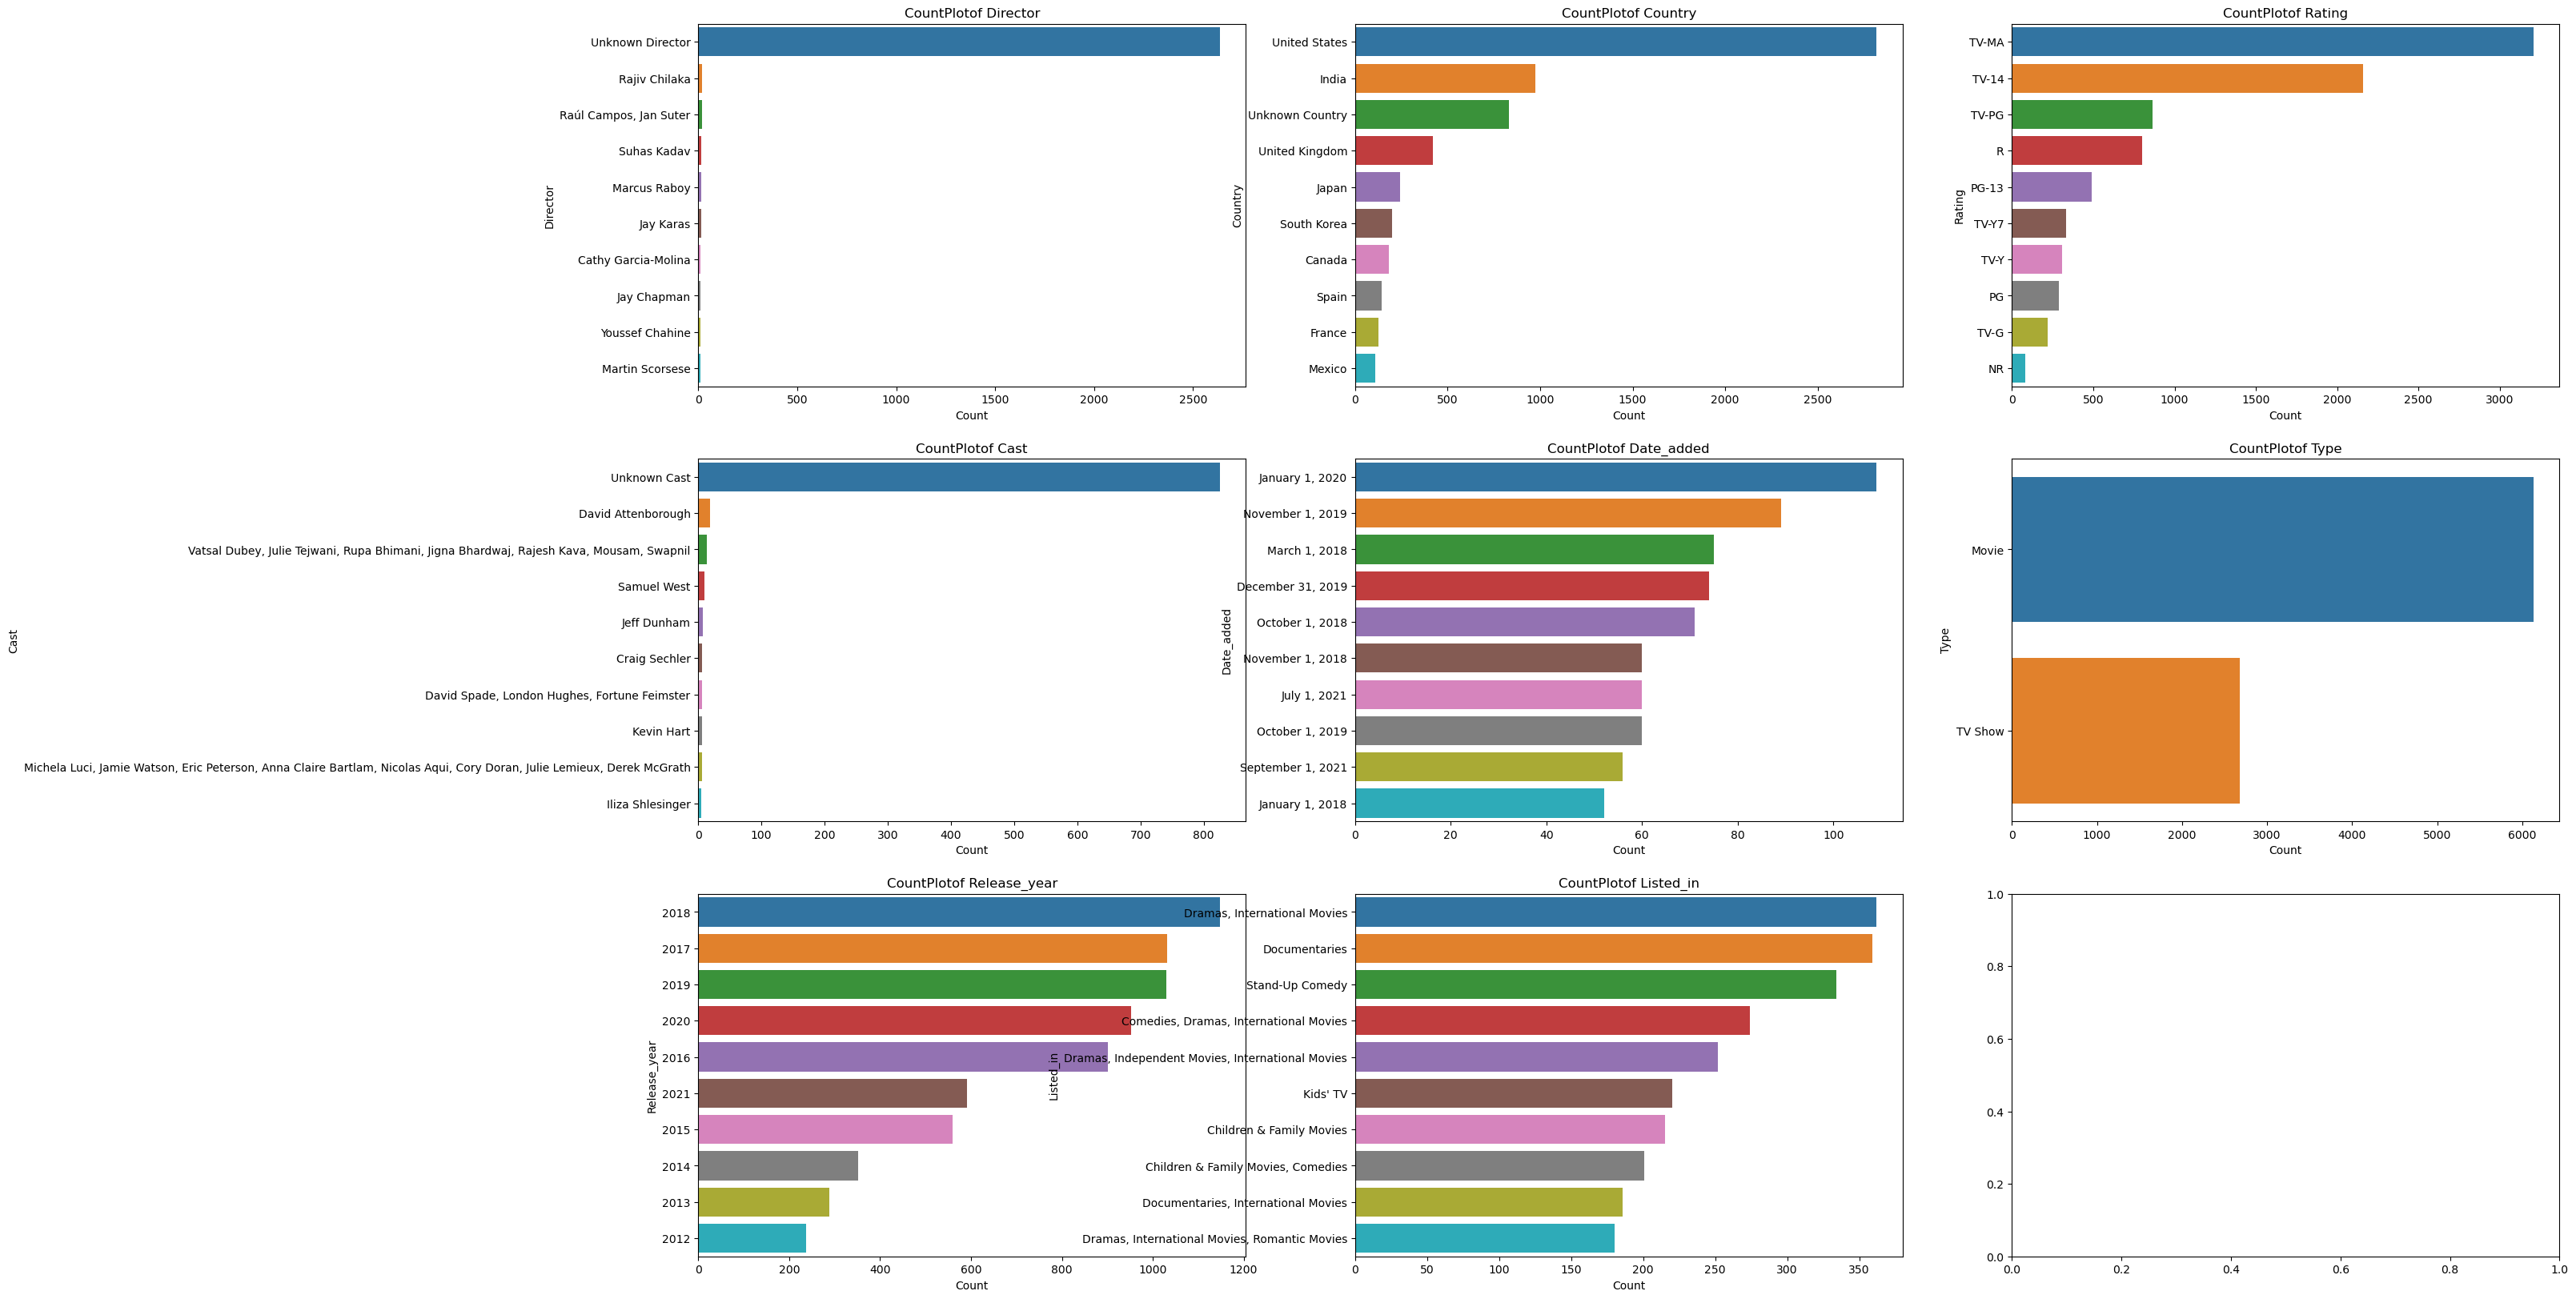

In [313]:
#define colour gradient from black to red

categorical_col = ['director', 'country', 'rating', 'cast', 'date_added','type','release_year', 'listed_in']

fig,axes =plt.subplots(3, 3,figsize=(30, 20))
axes= axes.flatten()
for i, column in enumerate(categorical_col):
  order =netflix_dataset[column].value_counts().index[:10]
  sns.countplot(y=netflix_dataset[column],order=order,ax=axes[i])
  axes[i].set_title(f'CountPlotof {column.capitalize()}')
  axes[i].set_xlabel('Count')
  axes[i].set_ylabel(column.capitalize())
  axes[i].tick_params(axis='y',labelsize=10)
  axes[i].tick_params(axis='x',labelsize=10)
plt.show()

**Insights:**

*Count of Unknown Directors and Cast:*

The 'director' and 'cast' columns reveal a significant number of entries with null values. This indicates an opportunity to enhance the data collection process to minimize the occurrence of these missing values.

*Dominance of U.S. Productions:*

The dataset shows that productions from the United States are prevalent in the 'country' column. This trend may reflect either the abundance of American content or Netflix's strategic emphasis on U.S. productions to align with its target audience.

*Prevalent Content Ratings:*

In the 'ratings' column, TV-MA and TV-14 are identified as the most frequent content ratings. This suggests that a considerable portion of Netflix's offerings is designed for mature viewers, focusing on a variety of themes that cater to adult audiences.

*Movie-Centric Catalog:*

Analysis of the 'type' column indicates that there are significantly more movies than TV shows in the dataset. This suggests that Netflix's catalog is predominantly movie-oriented, appealing to a broad spectrum of movie preferences.

*Increasing Release Volume:*

The data on 'release_year' illustrates a rising trend in the number of content releases over the years. The most recent years show the highest counts, indicating Netflix's commitment to continuously expanding its content library with new offerings.

**Recommendations:**
*
Diversification of Content Types*:

Netflix should explore diversifying its offerings by achieving a better balance between movies and TV shows. This can be accomplished by actively seeking out and promoting a wider range of engaging TV shows to meet various viewer preferences*.

Enhanced Metadata Collec*tion:

Improving the metadata collection process is essential to decrease the number of entries marked as 'Unknown.' Comprehensive and accurate metadata, including details about directors, enhances user experience by providing more informative and transparent con*tent.

Expansion of International* Content:

Netflix should look for opportunities to broaden its international content library to appeal to a global audience. Incorporating content from diverse regions and cultures can attract a wider viewer base and enhance Netflix's global *presence.

Targeted Content for Variou*s Age Groups:

Given the current trend towards mature audiences (TV-MA and TV-14), Netflix should consider developing and promoting content specifically designed for different age demographics. This includes family-friendly options and programming aimed at younger audiences to expand its viewer reach.

**5. Analysis of Unique TV Shows and Movies**

**5.1 Count of Unique TV Shows and Movies**

In [318]:
unique_tvShow = netflix_dataset[netflix_dataset['type'] == 'TV Show']['title'].nunique()
unique_Movies = netflix_dataset[netflix_dataset['type'] == 'Movie']['title'].nunique()

print(f"Count of unique TV Shows are: {unique_tvShow}")
print(f"Count of unique Movies are: {unique_Movies}")

Count of unique TV Shows are: 2676
Count of unique Movies are: 6131


**5.2 Number of unique titles produced in each country and displaying the top 10 countries.**

In [320]:
unnested_country.groupby('country')['title'].nunique().sort_values(ascending = False).head(10)

country
United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
 France            181
Spain              181
Name: title, dtype: int64

**5.3 Count of Total Movies and TV Shows using Univariate Analysis**

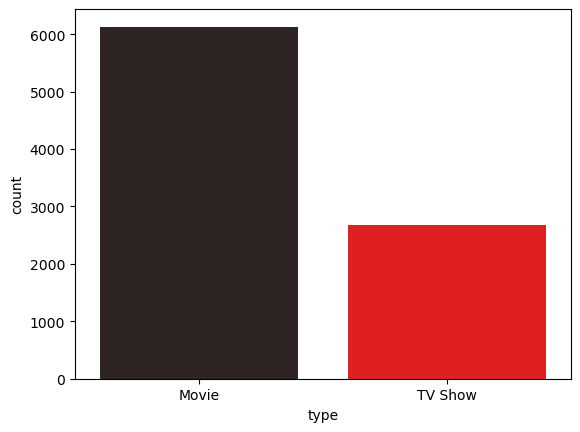

In [322]:
sns.countplot(x = 'type', data = netflix_dataset, palette = 'dark:red')
plt.show()

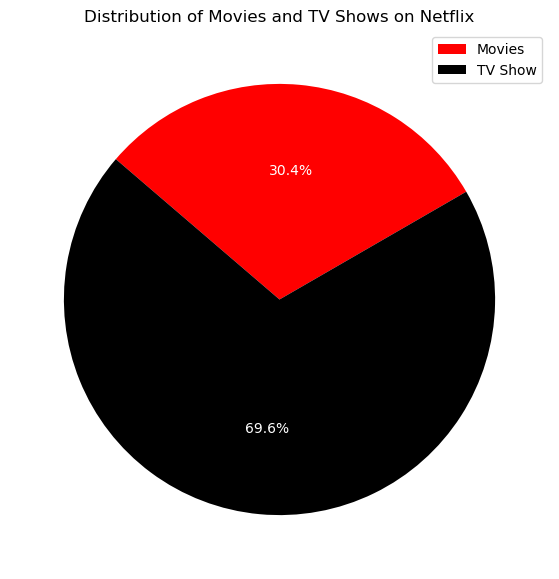

In [323]:
#Data for pie chart
pie_label = 'Movies', 'TV Show'
sizes = [unique_tvShow, unique_Movies]
colors_pie = ['red', 'black']

#Creating the pie chart
plt.figure(figsize = (10,7))
plt.pie(sizes, labels = pie_label, colors = colors_pie, autopct = '%1.1f%%', startangle = 30, textprops = {'color': 'white'})
plt.title('Distribution of Movies and TV Shows on Netflix')
plt.legend()
plt.show()

**Insights:**

The above pie chart indicates that the count of unique TV Shows is more than the count of unique Movies.

**6. Comparison of TV Shows V/S Movies**

**6.1 Count of Movies produced in each country and displaying the top 10 countries.**

In [327]:
#Creating a Boolean index for clean data
data_clean_bool = netflix_dataset['country'] != 'Unknown Country'

#Creating a Boolean index for Movie in 'type' column
type_movie = netflix_dataset['type'] == 'Movie'

#Displaying top 10 countries which produced the most movies
top10_countries_movies = netflix_dataset[(type_movie) & (data_clean_bool)].groupby('country')['title'].nunique().sort_values(ascending = False).head(10).rename('Movie Count')
top10_countries_movies

country
United States     2058
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: Movie Count, dtype: int64

**6.2 Count of TV Shows produced in each country and displaying the top 10 countries.**

In [329]:
#Creating a Boolean index for clean data
data_clean_bool = netflix_dataset['country'] != 'Unknown Country'

#Creating a Boolean index for Movie in 'type' column
type_TVShow = netflix_dataset['type'] == 'TV Show'

#Displaying top 10 countries which produced the most movies
top10_countries_tvShow = netflix_dataset[(type_TVShow) & (data_clean_bool)].groupby('country')['title'].nunique().sort_values(ascending = False).head(10).rename('TV Show Count')
top10_countries_tvShow

country
United States     760
United Kingdom    213
Japan             169
South Korea       158
India              79
Taiwan             68
Canada             59
France             49
Australia          48
Spain              48
Name: TV Show Count, dtype: int64

**6.3 Analysis through bar charts and subplots**

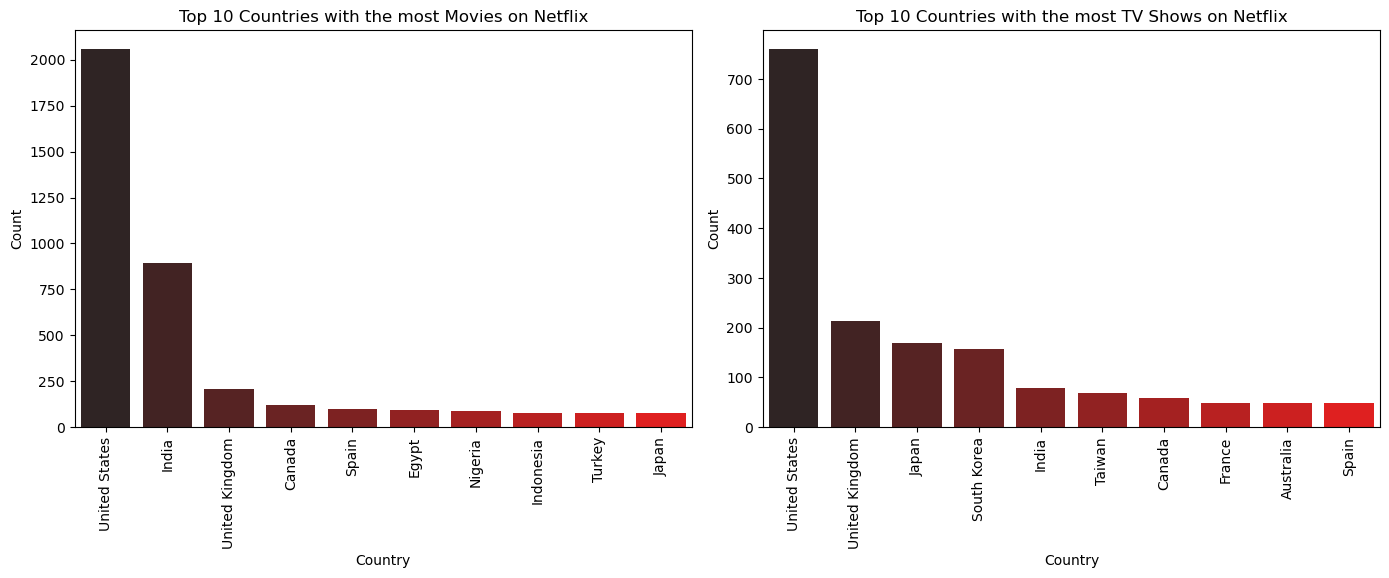

In [331]:
plt.figure(figsize=(14, 10))

# First subplot for movies
plt.subplot(2, 2, 1)
sns.barplot(x=top10_countries_movies.index, y=top10_countries_movies.values, palette='dark:red')
plt.title('Top 10 Countries with the most Movies on Netflix')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=90)

# Second subplot for TV shows
plt.subplot(2, 2, 2)
sns.barplot(x=top10_countries_tvShow.index, y=top10_countries_tvShow.values, palette='dark:red')
plt.title('Top 10 Countries with the most TV Shows on Netflix')
plt.ylabel('Count')
plt.xlabel('Country')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Insights:**

*TV Show and Movie Distrubution by Country:*

- USA, India and UK are the top 3 countries which have produced the most Movies.
- USA, UK and Japan are the top 3 countries wjich have produced the most TV Shows.
- India produces less number of TV Shows as compared to Movies.
- USA & UK are the important countries for producing Movies and TV Shows on Netflix.
  
All of the countries mentioned in the above charts have a significant presence in contributing content to Netflix.

**Recommendations:**

*Content Localization:*

With a significant number of TV shows and movies originating from certain countries, it's worth exploring opportunities for content localization. This could involve developing region-specific content or adapting existing shows to better suit the tastes of audiences in these key markets.

*Collaborations and Partnerships:*

Consider forming collaborations and partnerships with content creators, production studios, and talent from these leading countries. Such initiatives can help strengthen industry relationships and may lead to the creation of more diverse, engaging content.

*Genre Preferences:*

Examine the genre preferences of viewers in these top countries. Align content recommendations and new releases with the most popular genres in each region for a more tailored viewing experience.

**7. What is the best time to launch a TV show and Movie?**

**7.1 Best week to launch a TV Show and Movie**

In [336]:
#converting 'date_added' to column to datetime dtype
netflix_dataset = netflix_dataset[netflix_dataset['date_added'] != 'Unknown Date_added']
netflix_dataset['date_added'] = netflix_dataset['date_added'].str.strip()
netflix_dataset['date_added'] = pd.to_datetime(netflix_dataset['date_added'])

#extracting week from 'date_added' column
netflix_dataset['week'] = netflix_dataset['date_added'].dt.isocalendar().week

#counting the number of titles per week
movie_weeks = netflix_dataset[netflix_dataset['type'] == 'Movie'].groupby('week')['title'].count().sort_values(ascending = False)
tvshow_weeks = netflix_dataset[netflix_dataset['type'] == 'TV Show'].groupby('week')['title'].count().sort_values(ascending = False)

#extracting the week best for releasing TV Show and Movie
best_movie_week = movie_weeks.idxmax()
best_tvshow_week = tvshow_weeks.idxmax()

print(f"Week {best_movie_week} was the best week for releasing a new Movie.")
print(f"Week {best_tvshow_week} was the best week for releasing a new TV Show.")

Week 1 was the best week for releasing a new Movie.
Week 27 was the best week for releasing a new TV Show.


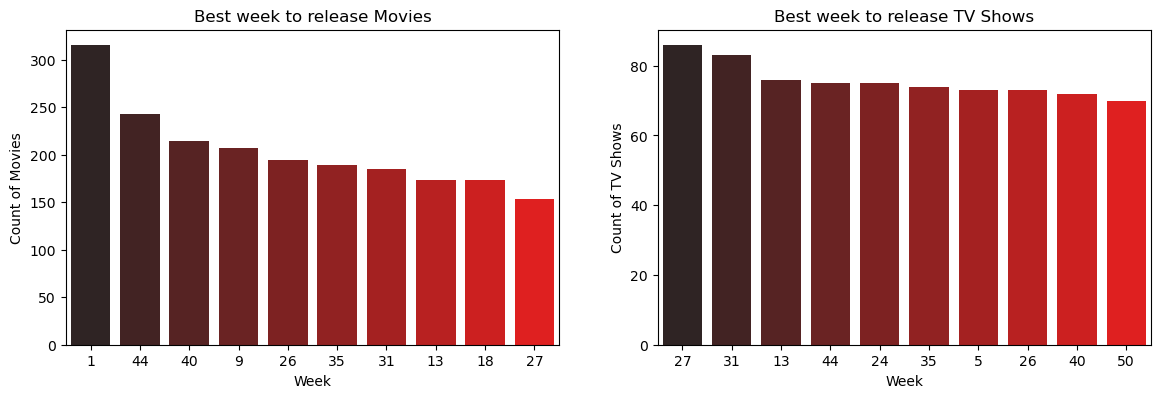

In [337]:
plt.figure(figsize = (14,9))
plt.subplot(2,2,1)
sns.barplot(x = movie_weeks.head(10).index, y = movie_weeks.head(10).values, order = movie_weeks.head(10).index, palette = 'dark:red')
plt.xlabel('Week')
plt.ylabel('Count of Movies')
plt.title('Best week to release Movies')

plt.subplot(2,2,2)
sns.barplot(x = tvshow_weeks.head(10).index, y = tvshow_weeks.head(10).values, order = tvshow_weeks.head(10).index, palette = 'dark:red')
plt.xlabel('Week')
plt.ylabel('Count of TV Shows')
plt.title('Best week to release TV Shows')
plt.show()

**7.2 Best month to launch a TV Show and Movie**

In [339]:
#extracting month from 'date_added' column
netflix_dataset['month'] = netflix_dataset['date_added'].dt.month

#counting the number of titles per month
movie_month = netflix_dataset[netflix_dataset['type'] == 'Movie'].groupby('month')['title'].count().sort_values(ascending = False)
tvshow_month = netflix_dataset[netflix_dataset['type'] == 'TV Show'].groupby('month')['title'].count().sort_values(ascending = False)

#extracting the month with the most movie & tv show release
best_movie_month = movie_month.idxmax()
best_movie_tvshow = tvshow_month.idxmax()

print(f"The best month for releasing a Movie was {best_movie_month}")
print(f"The best month for releasing a TV Show was {best_movie_tvshow}")

The best month for releasing a Movie was 7
The best month for releasing a TV Show was 12


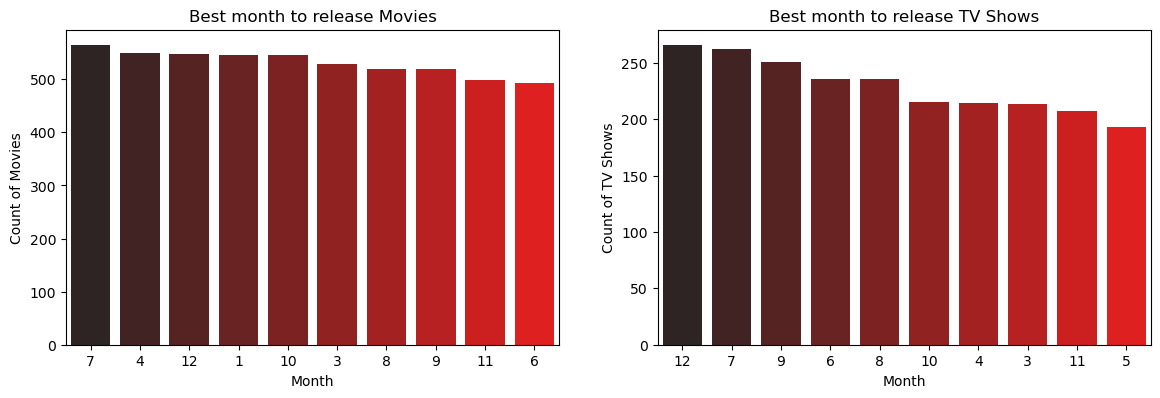

In [340]:
plt.figure(figsize = (14,9))
plt.subplot(2,2,1)
sns.barplot(x = movie_month.head(10).index, y = movie_month.head(10).values, order = movie_month.head(10).index, palette = 'dark:red')
plt.xlabel('Month')
plt.ylabel('Count of Movies')
plt.title('Best month to release Movies')

plt.subplot(2,2,2)
sns.barplot(x = tvshow_month.head(10).index, y = tvshow_month.head(10).values, order = tvshow_month.head(10).index, palette = 'dark:red')
plt.xlabel('Month')
plt.ylabel('Count of TV Shows')
plt.title('Best month to release TV Shows')
plt.show()

**Insights:**

*Seasonal Distribution of Releases:*

The charts highlight the distribution of content releases across the year, showing clear peaks during key periods when new content is frequently launched.

*Optimal Timing for TV Show:*

Analysis indicates that the 27th week of the year is ideal for releasing TV shows on Netflix, with December emerging as another strong month for new show launches.

*Optimal Timing for Movies:*

For movies, the first week of the year is the best time for releases, with July identified as the top month. Additional peak release periods for movies include weeks in July, early October, late February to early March, late June to early July, and late August to early September.

This trend suggests that movie production surges during early summer, early fall, and late winter to early spring.

**Recommendations:**

*Strategic Content Release:*

Plan content launches to coincide with peak months for TV shows and movies, leveraging these insights to maximize viewership and engagement.

*Promotions and Marketing:*

Boost visibility by aligning marketing efforts with the identified peak months. Consider targeted campaigns or collaborations to increase awareness and attract a wider audience.

*Diversify Content:*

Evaluate how different genres perform across various months, and tailor content accordingly. Offering diverse content throughout the year can cater to a broad range of audience preferences.

*Optimal Release Timing:*

Use data-driven insights on the best days for releasing TV shows and movies to fine-tune release schedules. This can help create a greater impact and boost viewership on high-traffic days.

*Engagement Strategies:*

Enhance audience interaction during peak release periods through features like social media campaigns, live events, or interactive content, enriching the viewer experience.

*Continuous Monitoring:*

Stay responsive to changing trends by regularly tracking viewership data and adapting release strategies accordingly. This approach ensures that Netflix remains agile in meeting evolving audience preferences.

*Collaboration Opportunities:*

Pursue collaborations with influencers, creators, or events during peak months to amplify the impact of new content. Such partnerships can extend reach and engagement.

By integrating these recommendations, Netflix can enhance its release strategy, increase audience engagement, and sustain a vibrant platform year-round.

**8. Analysis of actors/directors of different types of TV Shows & Movies**

**8.1 Top 10 actors who have appeared in most TV Shows or movies**

In [345]:
#clearing any leading/trailing whitespace from the'cast' column
unnested_cast['cast'] = unnested_cast['cast'].str.strip()

#extracting top 10 actors who have appeared in most unique TV Shows or Movies
top10_actors = unnested_cast.groupby('cast')['title'].nunique().sort_values(ascending = False).head(10)
top10_actors

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Amitabh Bachchan    28
Name: title, dtype: int64

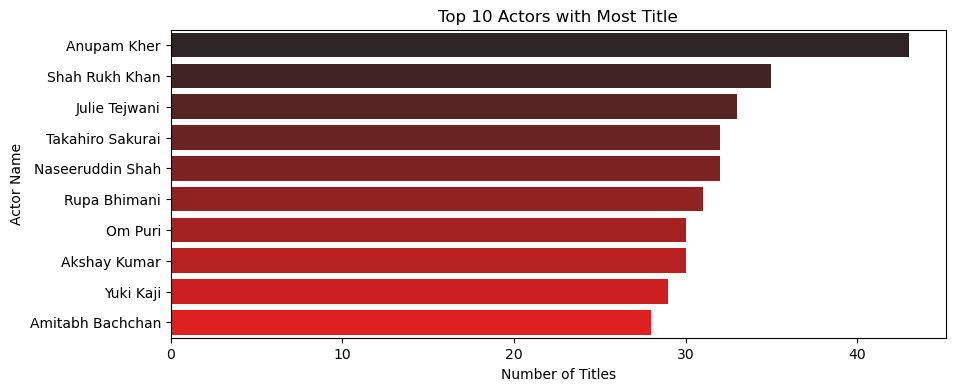

In [346]:
plt.figure(figsize = (10,4))
sns.barplot(y = top10_actors.index, x = top10_actors.values, palette = 'dark:red')
plt.ylabel('Actor Name')
plt.xlabel('Number of Titles')
plt.title('Top 10 Actors with Most Title')
plt.show()

**Insights:**

*Anupam Kher's Dominant Presence:*

Anupam Kher tops the list with 43 appearances, highlighting his prolific and enduring role in the entertainment industry. His consistent involvement signals a valued and reliable contribution across various projects.

*Shah Rukh Khan's Widespread Appeal:*

Following closely with 35 appearances, Shah Rukh Kha's extensive body of work reflects his widespread popularity. His presence underscores his strong connection with a broad audience.

*Global Diversity in Casting:*

The list showcases international talent, emphasizing global appeal. Notable actors like Japanese voice artists Takahiro Sakurai and Yuki Kaji add cultural diversity to the cast.

*Blend of Veteran and Emerging Talent:*

With seasoned actors like Naseeruddin Shah and Amitabh Bachchan featured, there's a balanced mix of experienced veterans and newer talents. This combination brings a dynamic range of performances to the screen.

**Recommendations:**

*Partner with High-Profile Actors:*

With Anupam Kher's significant presence and Shah Rukh Khan's immense popularity, Netflix could benefit from collaborating with these influential actors. Their fanbases can drive substantial viewership and contribute to the success of Netflix projects.

*Expand Global Content Offerings:*

The presence of international talents like Takahiro Sakurai and Yuki Kaji points to an opportunity for Netflix to broaden its content diversity. By creating and promoting content that appeals to global audiences, Netflix can strengthen its international reach.

*Capitalize on Veteran Actors for Prestige Projects:*

The experience and stature of actors like Naseeruddin Shah and Amitabh Bachchan present an opportunity for Netflix to produce high-quality, critically acclaimed content. Their participation can lend credibility and elevate the platform's content offerings.

**Final Thoughts:**

By acting on these insights, Netflix can make informed decisions regarding casting, content development, and audience engagement. A mix of established stars and diverse talents will enhance the platform's ability to attract and retain a wide, engaged audience.

**8.2 Top 10 directors who have appeared in most TV Shows or movies**

In [351]:
#clearing any leading/trailing whitespace from the'director' column
unnested_director['director'] = unnested_director['director'].str.strip()

#extracting top 10 directors who have appeared in most unique TV Shows or Movies
top10_directors = unnested_director.groupby('director')['title'].nunique().sort_values(ascending = False).head(10)
top10_directors

director
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
Youssef Chahine        12
Jay Chapman            12
Martin Scorsese        12
Name: title, dtype: int64

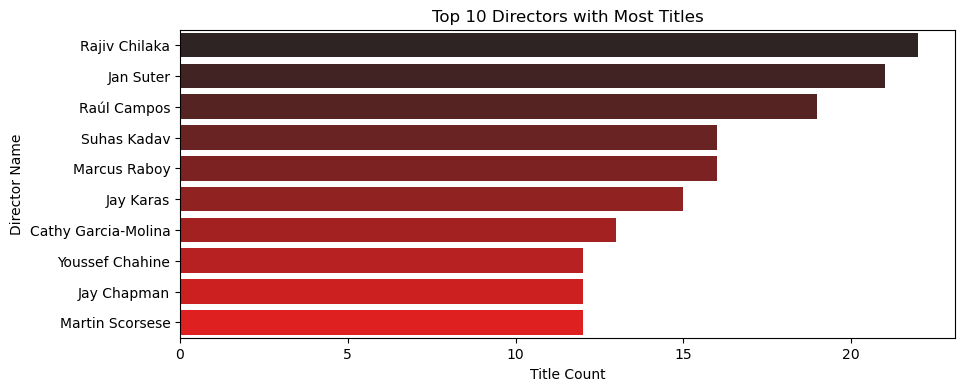

In [352]:
plt.figure(figsize = (10,4))
sns.barplot(y = top10_directors.index, x = top10_directors.values, palette = 'dark:red')
plt.title('Top 10 Directors with Most Titles')
plt.ylabel('Director Name')
plt.xlabel('Title Count')
plt.show()

**Insights:**

*Top 3 Directors:*

Rajiv Chilaka, Raúl Campos, and Jan Suter are the top three directors with 22, 21, and 19 productions, respectively, showcasing their prolific contribution to Netflix's content library.

*Diverse Content Creation:*

The presence of directors from various backgrounds and regions underscores Netflix's dedication to fostering diversity in its content production.

*Notable Collaboration with Martin Scorsese:*

The inclusion of renowned filmmaker Martin Scorsese among the top 10 directors highlights Netflix's commitment to partnering with established industry legends.

**Recommendations:**
  
*Ongoing Collaboration and Growth:*

Netflix should continue its partnerships with prolific directors like Rajiv Chilaka, Jan Suter, and Raúl Campos, ensuring a diverse and expansive content library.

*Support for Emerging Talent:*

The inclusion of directors such as Suhas Kadav and Marcus Raboy reflects Netflix's willingness to embrace emerging talent, emphasizing the importance of nurturing new voices in the entertainment industry.

*Quality Content:*

Utilize the experience and expertise of directors like Martin Scorsese to create high-quality, acclaimed content that attracts a wide audience. 

*Regional Content:*

Directors such as Cathy Garcia-Molina and Youssef Chahine could be leveraged to explore and produce regional content, catering to diverse audiences around the world. These recommendations emphasize collaboration, support for emerging talent, focus on quality, and exploration of regional content to enhance Netflix's content offerings.

**9. Which genre movies are more popular or produced more**

In [356]:
!pip install wordcloud

In [357]:
from wordcloud import WordCloud

In [358]:
movie_data = netflix_dataset[netflix_dataset['type'] == 'Movie']

#Filtering the dataset for movies
movie_genre_data = unnest_df(movie_data, 'listed_in')
movie_genre_data

#clearing any leading/trailing whitespace from the'director' column
movie_genre_data['listed_in'] = movie_genre_data['listed_in'].str.strip()

#counts of title for different genres
top10_genre = movie_genre_data.groupby('listed_in')['title'].nunique().sort_values(ascending = False).head(10)
top10_genre

listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
Documentaries                869
Action & Adventure           859
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Thrillers                    577
Music & Musicals             375
Name: title, dtype: int64

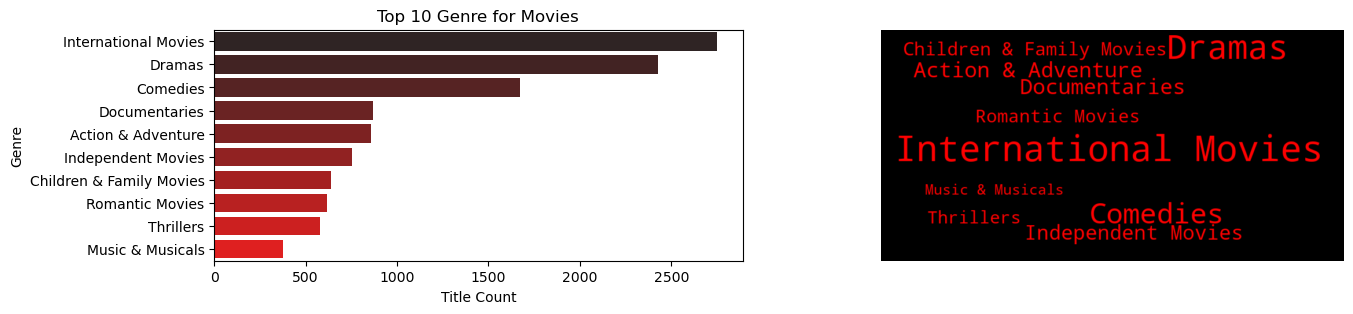

In [359]:
#creating a wordcloud
def red_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "rgb(255, 0, 0)"

wordcloud_genre = WordCloud(width = 800, height = 400, background_color = 'black', min_font_size = 10, color_func = red_color_func).generate_from_frequencies(top10_genre)

#Plotting using seaborn for styling
plt.figure(figsize = (15,3), facecolor = None)

plt.subplot(1,2,1)
sns.barplot(y = top10_genre.index, x = top10_genre.values, palette = 'dark:red')
plt.title('Top 10 Genre for Movies')
plt.ylabel('Genre')
plt.xlabel('Title Count')

plt.subplot(1,2,2)
plt.imshow(wordcloud_genre, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Insights:**

Most movie produced genre are produced in the Internation movies, Dramas, Comedies, followed by Documentaries, any many more.

**Recommendations:**

*Content Acquisition and Creation:*

Consider acquiring or creating more content in the most popular genres. This can attract a larger audience and enhance user engagement.

*Content Curation:*

Curate and highlight movies from diverse genres to cater to a broader audience with different preferences.

*User Recommendations:*

Leverage user data and preferences to provide personalized recommendations for movies in genres that users might enjoy based on their viewing history. 

*Genre-Specific Promotions:*

Run promotions or campaigns to promote movies from specific genres, especially those that are less explored. This can help users discover new content.

*User Surveys:*

Conduct user surveys or gather feedback to understand preferences and identify potential gaps in content offerings. This can inform decisions on acquiring or producing content in specific genres. 

*Dynamic Content Library:*

Regularly update and refresh the content library to keep it dynamic and in line with evolving viewer preferences.

**10. After how many days the movie will be added to Netflix after the release of the movie**

In [363]:
# Convert 'release_year' to datetime using .loc to avoid the SettingWithCopyWarning
netflix_dataset.loc[:, 'release_date'] = pd.to_datetime(netflix_dataset['release_year'], format='%Y')

# Calculate the difference in days using .loc
netflix_dataset.loc[:, 'days_to_add'] = (netflix_dataset['date_added'] - netflix_dataset['release_date']).dt.days
netflix_dataset.loc[:, 'days_to_add']

0        633
1        266
2        266
3        266
4        266
        ... 
8802    4706
8803     546
8804    3956
8805    5123
8806    1521
Name: days_to_add, Length: 8797, dtype: int64

In [364]:
#average time to add a title to Netflix after its initial release
average_days_to_add = netflix_dataset[netflix_dataset['type'] == 'Movie']['days_to_add'].agg('mean').round(2)

#mode time to add a title after its initial release
mode_days_to_add = netflix_dataset[netflix_dataset['type'] == 'Movie']['days_to_add'].mode()

print(f'The average days of adding a movie on Netflix after its release is {average_days_to_add} days.')
if len(mode_days_to_add) == 1:
    print(f'The mode days of adding a movie on Netflix after its release is {mode_days_to_add[0]} days.')
else:
    print(f'The mode days of adding a movie on Netflix after its release are {list(mode_days_to_add)} days.')

The average days of adding a movie on Netflix after its release is 2273.14 days.
The mode days of adding a movie on Netflix after its release is 334 days.


**Insights:**

After release it will take approximately 334 days to be added in Netflix for most of the Movies/Tv shows.

These insights suggest that while the averageduration is relatively long, there are specific time periods,such as the mode of 334.0 days that are more prevalent in the acquisition and addition of movies to Netflix following their original release.

**11. Exploring potential correlations in the relationship between a unique title's rating (like TV-MA, TV-PG) and its genre and duration.**

In [367]:
movie_data = netflix_dataset[netflix_dataset['type'] == 'Movie']

#converting 'duration' column into a numeric value for movies
movie_data['duration_numeric'] = movie_data['duration'].str.extract('(\d+)').astype(float)

#exploring relationship between a movie's rating and its genre
genre_rating = unnest_df(movie_data, 'listed_in').groupby(['rating', 'listed_in']).size().unstack().fillna(0)

#exploring relationship between a movie's rating and its duration
duration_rating = movie_data.groupby('rating')['duration_numeric'].mean()

print(genre_rating)
print(duration_rating)

listed_in        Anime Features   Children & Family Movies   Classic Movies  \
rating                                                                        
66 min                      0.0                        0.0              0.0   
74 min                      0.0                        0.0              0.0   
84 min                      0.0                        0.0              0.0   
G                           0.0                        0.0              4.0   
NC-17                       0.0                        0.0              0.0   
NR                          0.0                        0.0              0.0   
PG                          1.0                       16.0             12.0   
PG-13                       2.0                        9.0              4.0   
R                           0.0                        0.0              8.0   
TV-14                      20.0                        1.0              4.0   
TV-G                        0.0                     

C:\Users\hp\AppData\Local\Temp\ipykernel_23328\1075951766.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['duration_numeric'] = movie_data['duration'].str.extract('(\d+)').astype(float)


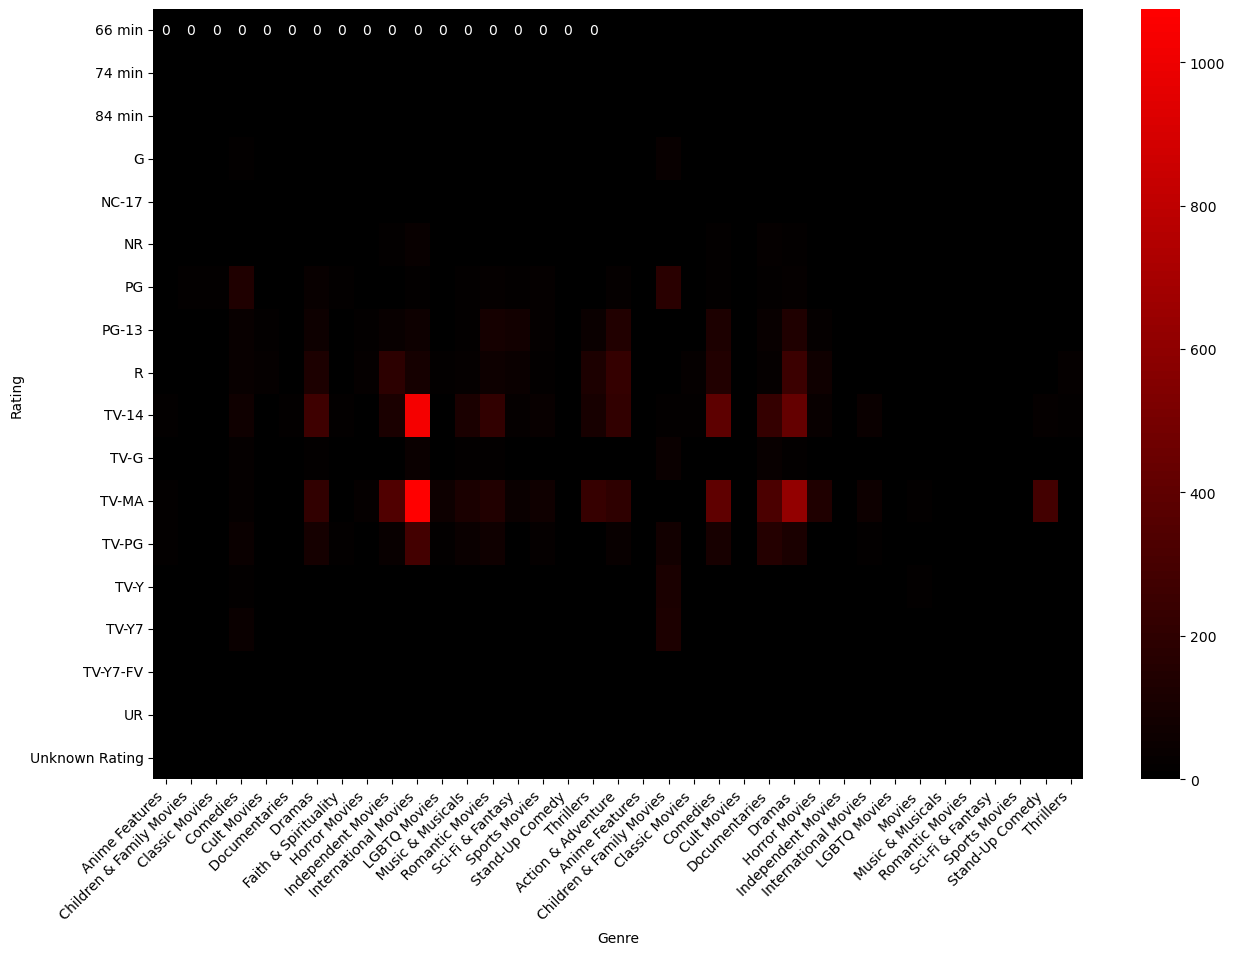

In [368]:
#creating a heatmap for the relationship between movie rating and genre
plt.figure(figsize = (15,10))
colors = ['#000000', '#FF0000']  # Red to Black
cmap_color = LinearSegmentedColormap.from_list("red_black", colors, N=100)
sns.heatmap(genre_rating, cmap = cmap_color, annot = True, fmt = ".0f")
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.show()

#Note: The heatmap represents the count of movies in each genre-rating combination.
#Higher counts are represented by darker shades of red.

**Insights:**

*Marketing and Promotion:*

By identifying popular genres within specific rating categories, Netflix can tailor its marketing efforts more effectively. For instance, promoting family-friendly genres in regions with a high concentration of subscribers with children can boost engagement and attract the right audience.

*Content Strategy and Planning:*

Understanding the distribution of genres across various ratings enables Netflix to refine its content acquisition and production strategies. For example, if there is a significant number of 'Dramas' in the 'TV-MA' category, this could signal a demand for mature, intricate narratives, prompting Netflix to invest in similar content.

*Viewer Preferences and Trends:*

Analyzing the relationship between genres and ratings helps uncover viewer preferences and emerging trends. For example, a rise in 'R'-rated horror films may point to a growing interest in adult-themed horror content, informing Netflix's future content offerings.

C:\Users\hp\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


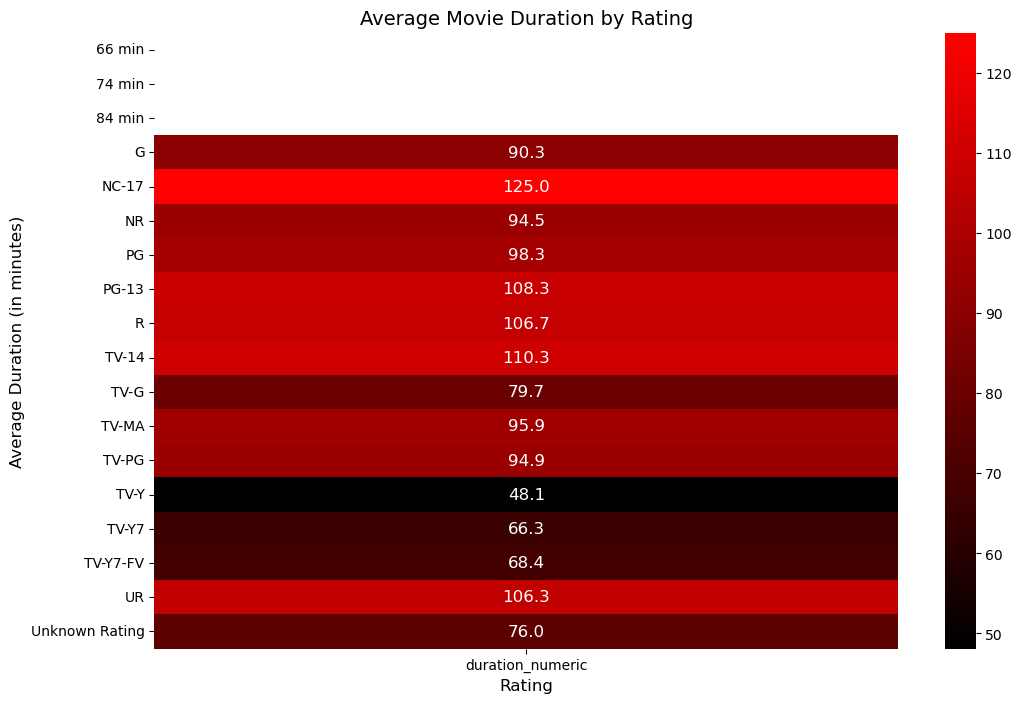

In [370]:
#converting series into dataframe
duration_rating_df = duration_rating.reset_index()

#creating a heatmap for relationship between movie duration and rating
plt.figure(figsize = (12,8))
sns.heatmap(duration_rating_df.set_index('rating'), cmap = cmap_color, annot = True, fmt = ".1f", annot_kws = {'size' : 12})
plt.title('Average Movie Duration by Rating', fontsize = 14)
plt.xlabel('Rating', fontsize = 12)
plt.ylabel('Average Duration (in minutes)', fontsize = 12)
plt.show()

**Insights:**

*Longer Movies in Certain Ratings:*

Ratings like 'NC-17' and 'R' show longer average durations. This could indicate that more mature content (often found in these categories) tends toward longer storytelling formats.

*Shorter Movies in Family-Friendly Ratings:*

Ratings like 'G', 'TV-Y', and 'TV-Y7' have shorter average durations. This aligns with the expectation that content aimed at younger audiences is often shorter to match their attention spans.

*Consistency in Popular Ratings:*

Ratings like 'PG', 'PG-13', and 'TV-MA' show a consistent average duration around 90-110 minutes, typical for feature films.

**12. Average Duration of Movies across Different Genres**

Its possible that some movie durations are not provided, so we'll replace NaNs with the mean duration.


In [373]:
#Handling NaN values in 'duration' column
mean_duration = movie_data['duration'].str.replace(' min','').astype(float).mean()
movie_data['duration'] = movie_data['duration'].str.replace(' min','').fillna(mean_duration).astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_23328\1389762081.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_data['duration'] = movie_data['duration'].str.replace(' min','').fillna(mean_duration).astype(int)


In [417]:
#Repeating the un-nesting and averaging process
unnested_genre = unnest_df(movie_data, 'listed_in')
average_duration_per_genre = unnested_genre.groupby('listed_in')['duration'].mean().reset_index()
sorted_average_duration_per_genre = average_duration_per_genre.sort_values(by = 'duration', ascending = False)
sorted_average_duration_per_genre


,listed_in,duration
2,Classic Movies,127.138889
6,Dramas,116.288996
21,Classic Movies,114.825000
18,Action & Adventure,113.515716
25,Dramas,111.377500
13,Romantic Movies,110.706362
10,International Movies,110.461509
17,Thrillers,108.082031
28,International Movies,108.062500
12,Music & Musicals,106.960784


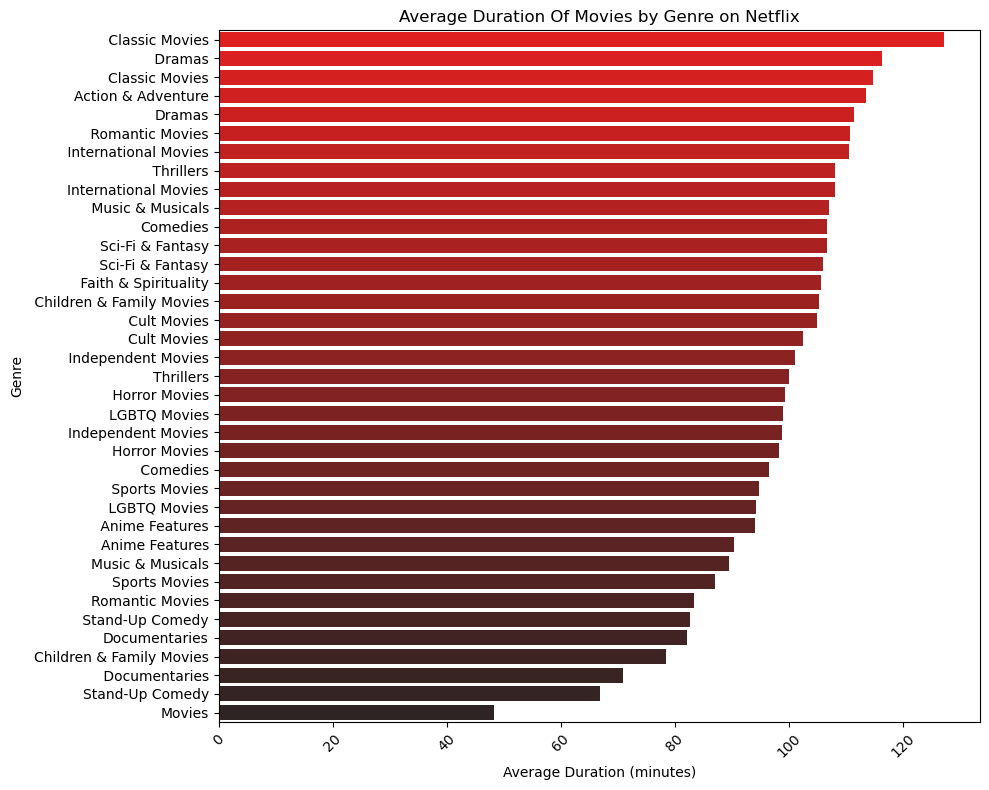

In [419]:
#Plotting the data
p_color = sns.color_palette("dark:red_r", len(sorted_average_duration_per_genre))

#Creating the bar plot
plt.figure(figsize = (10,8))
sns.barplot(x = 'duration', y = 'listed_in', data = sorted_average_duration_per_genre, palette = p_color)
plt.title('Average Duration Of Movies by Genre on Netflix')
plt.xlabel('Average Duration (minutes)')
plt.ylabel('Genre')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Insights:**

*Genre-Specific Duration Trends:*

Classic Movies and Dramas tend to have longer durations. This could be attributed to the narrative depth and character development often required in these genres.

Documentaries and Stand-Up Comedy typically have shorter durations. Documentaries may aim for conciseness to effectively deliver factual content, while stand-up comedy specials are generally shorter to maintain audience engagement.

*Viewer Preferences and Consumption Patterns:*

Shorter durations in genres like documentaries might align with viewers' preferences for concise, informative content that can be consumed in a single sitting.

Longer films in genres like dramas and classic movies might be more appealing to viewers who prefer in-depth storytelling and are willing to commit more time to a single movie.

**Recommendations:**

*Strategic Release Timing:*

The time series analysis of content added could guide Netflix in optimizing the timing of new releases. Understanding seasonal patterns or specific times when subscribers are more likely to watch new content can help in planning release schedules. According to my Analysis, Fridays are the most popular day for releases; week 1 is the most popular for Movies and week 27 is the most popular for TV Shows. July is the best month to release a Movie and December is the best month to release a TV Show.

*Expand Popular Genres in Key Ratings:*

If certain genres are performing well in specific rating categories, consider increasing the production or acquisition of similar content to cater to the established audience. For instance, TV-MA & TV-14 in International Movies and TV-MA in Dramas is a very popular rating-genre pair.